<a href="https://colab.research.google.com/github/liggettla/intro_ML/blob/master/2_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning

# Table of Contents

1. [k-Nearest Neighbors](#k-Nearest-Neighbors)
1. [k-Neighbors Regression](#k-Neighbors-Regression)
1. [Linear Regression](#Linear-Regression)
1. [Ridge Regression](#Ridge-Regression)
1. [Lasso Regularization](#Lasso-Regularization)
1. [Linear models for classification](#Linear-models-for-classification)
1. [Linear models for multiclass classification](#Linear-models-for-multiclass-classification)
1. [Naive Bayes Classifiers](#Naive-Bayes-Classifiers)
1. [Decision Trees](#Decision-Trees)
1. [Ensembles of Decision Trees](#Ensembles-of-Decision-Trees)
1. [Kernelized Support Vector Machines](#Kernelized-Support-Vector-Machines)


In [2]:
!pip install -q mglearn

import mglearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import graphviz
import os
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.datasets import load_boston, load_breast_cancer, make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import Lasso, LinearRegression, LogisticRegression, Ridge
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC

     |████████████████████████████████| 542kB 3.4MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


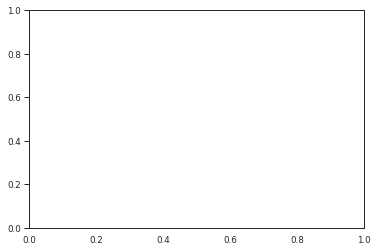

In [7]:
def pretty(x_axis=True, x_ticks=False, x=False):
    if x:
        x_axis=False
        x_ticks=True
    else:
        x_axis=True
        x_ticks=False
    sns.set_palette('pastel')
    sns.set_style('ticks')
    sns.set_context('paper', font_scale=1)

    sns.despine(offset=10, trim=True, bottom=x_axis)
    plt.tick_params(labelbottom=True, bottom=x_ticks)

pretty()
    
def legend():
    plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1),
           ncol=1) # no legend overlap

# k-Nearest Neighbors
k-NN algorithms often perform well and yield reasonable results without much adjustment, which makes them a good first test. They do tend to be relatively slow algorithms and have difficulty handling data with many features or sparse data, that is 0 most of the time.

The first dataset that will be used is the `forge` dataset, which is just some synthetic data of nothing in particular, but it is has two classes which can then be displayed on and x-y plot.  
The dataset contains 26 data points each classified by 2 features.

X.shape: (26, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


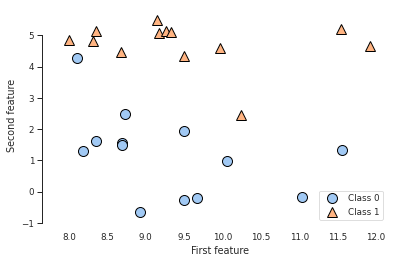

In [5]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
pretty()
print("X.shape: {}".format(X.shape))

The synthetic `wave` dataset will be used to illustrate regression algorithms.  
It is important to note that the two datasets used here are low-dimensional datasets in that they only have two features each and can therefore be easily represented in two dimensions. Inspecting low-level datasets can be helpful because it is easy for the mind to understand distribution and patterns. High-dimensional datasets have more features and are therefore much more different to visually inspect, meaning that one must be cautious about over interpreting apparent patterns in displayed high-dimensional data.

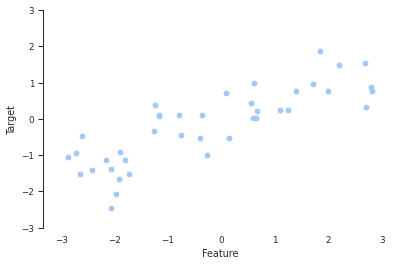

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
pretty()

Another dataset that will be used here is the wisconsin breast cancer dataset which contains clinical measurements of tumor size that can be used to predict whether the tumor is benign or malignant.  
The data is stored in a bunch object which is similar to a dictionary.

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [0]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

The cancer dataset has 569 data points, each with 30 features.

In [0]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [0]:
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [0]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


As an example of a real world regression set, the boston housing data will be used to predict the median value of homes in different neighborhoods in the 1970s.

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [0]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In the original boston housing data, there are 13 measurments for each of the data points. This data can be expanded using a process called feature engineering which involves using the product of features. For example the crime rate and highway accessibility are both features but the product of the two can be used as another feature.  
This expanded data set is loaded here, which contains the 13 original features and the 91 possible combinations with replacement of those features.

In [0]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


The k nearest neighbors is really the most simple machine learning analysis because it just involves plotting the data and then the test set points by their nearest data points.  
In the graph below, three data points are added and marked as stars, and the nearest related data point is connected.

/home/alex/anaconda3/envs/informatics/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


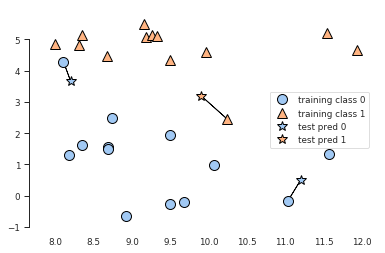

In [0]:
mglearn.plots.plot_knn_classification(n_neighbors=1)
pretty()

A voting logic is used to determine the label of the test data.

/home/alex/anaconda3/envs/informatics/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


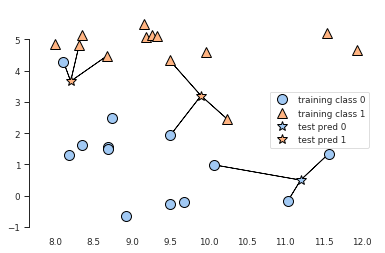

In [0]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
pretty()

Here the k-nearest neighbor algorithm is applied to the forge data using `scikit-learn`.  
As with the iris dataset, the first thing to do is split the data into training and testing sets.

In [0]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/home/alex/anaconda3/envs/informatics/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Next, the class is imported and instantiated, and the number of neighbors used is set to 3 here.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

The classifier is then fit using the training dataset. For the `KNeighborsClassifier`, all this really means is storing the training data in the class instance.

In [0]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

The `predict` method is used to compute the nearest neighbors and predict a classification.

In [0]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


The `score` method can then be used to test the accuracy of the model.

In [0]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


For two-dimensional sets, a decision boundary can be visualized that separates the two classifications.  

As you can see on the left in the figure, using a single neighbor results in a decision boundary that follows the training data closely. Considering more and more neighbors leads to a smoother decision boundary. A smoother boundary corresponds to a simpler model. In other words, using few neighbors corresponds to high model complexity (as shown on the left side of Figure), and using many neighbors corresponds to low model complexity (as shown on the right side of Figure). If you consider the extreme case where the number of neighbors is the number of all data points in the training set, each test point would have exactly the same neighbors (all training points) and all predictions would be the same: the class that is most frequent in the training set.

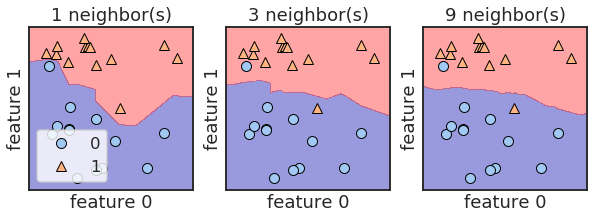

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
fig.patch.set_facecolor('white')

Here, the same logic as above is applied to the real world breast cancer dataset.  

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. While real-world plots are rarely very smooth, we can still recognize some of the characteristics of overfitting and underfitting (note that because considering fewer neighbors corresponds to a more complex model, the plot is horizontally flipped relative to the illustration in Figure). Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

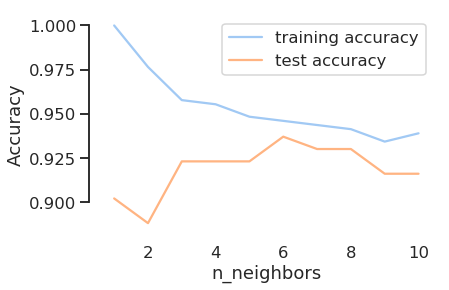

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
pretty()

# k-Neighbors Regression
There is a k-nearest neighbors algorithm that can be used for regression analysis as well. Here the wave dataset can be used to illustrate the method.  
With `k=1` the prediction value is just the same y-value as the nearest neighbor. When using `k>1` the y-val is the mean of the neighbors.

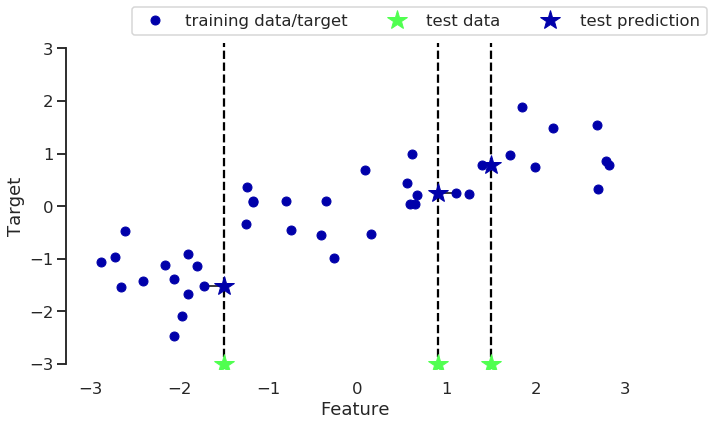

In [0]:
mglearn.plots.plot_knn_regression(n_neighbors=1)
pretty()

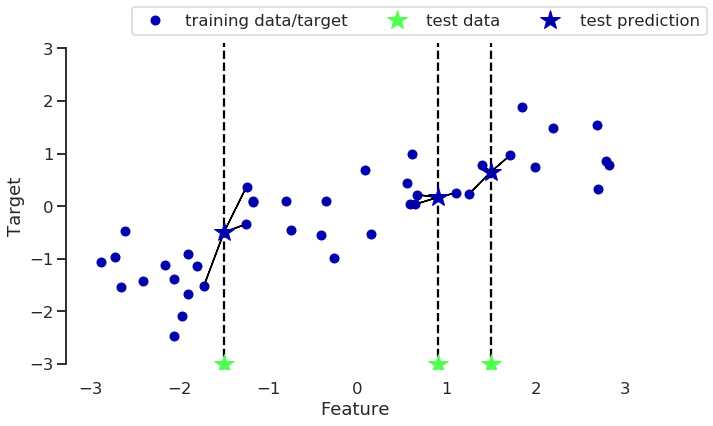

In [0]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
pretty()

The k-nearest neighbors algorithm is implemented in the `KNeighborsRegressor` class.

In [0]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

Predictions can now be made on the test set.

In [0]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


The model is evaluated using the `score` method which returns and R-squared score where a value of 1 is a perfect prediction and a value of 0 is a constant model that predicts the mean of the training set.

In [0]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


As we can see from the plot, using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. Considering more neighbors leads to smoother predictions, but these do not fit the training data as well.

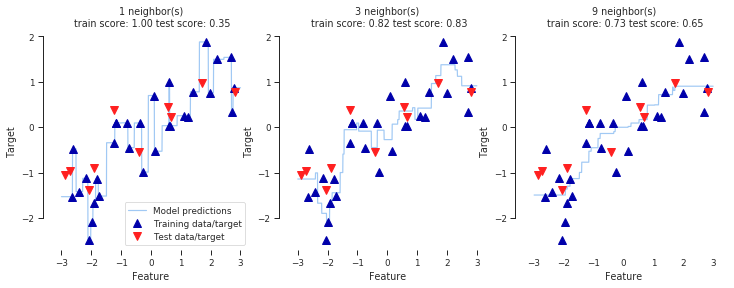

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")
sns.set_context('paper', font_scale=1)
pretty()

As we can see from the plot, using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. Considering more neighbors leads to smoother predictions, but these do not fit the training 
data as well.  

In principle, there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter. Choosing the right distance measure is somewhat beyond the scope of this book. By default, Euclidean distance is used, which works well in many settings.  

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is usually very fast, but when your training set is very large (either in number of features or in number of samples) prediction can be slow. When using the k-NN algorithm, it’s important to preprocess your data (see Chapter 3). This approach often does not perform well on datasets with many features (hundreds or more), and it does particularly badly with datasets where most features are 0 most of the time (so-called sparse datasets).  

So, while the nearest k-neighbors algorithm is easy to understand, it is not often used in practice, due to prediction being slow and its inability to handle many features. The method we discuss next has neither of these drawbacks.

# Linear models for regression

Here the wave data is used to predict a linear regression. It is an assumption with a linear model that the target y is a linear combination of the features within the data. This may be unrealistic in many cases, but it can often be quite accurate.  

For datasets that have many features linear models can be quite helpful, as any dataset that has more features than data oints, the target y can be perfectly modeled as a linear function.

Linear models make a prediction using a linear function of the input features.  

A linear model is generally in the format of `ŷ = w[0] * x[0] + b` which is the formula for a line. In this case, `ŷ` is the prediction made by the model, `w[0]` is the slope, and `b` is the y-axis offset.  

The above formula has just a single feature, but for a model with multiple features, the equation is this: `ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b`, which is essentially a weighted average of each of the features.

w[0]: 0.393906  b: -0.031804


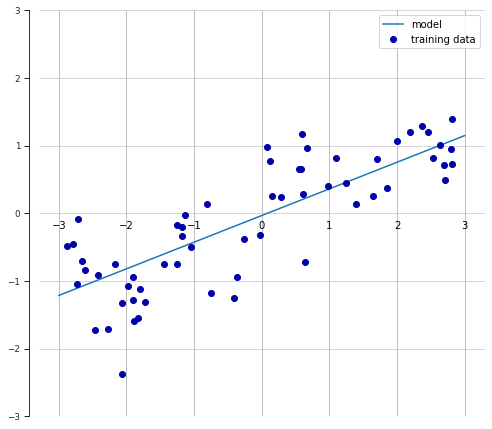

In [0]:
mglearn.plots.plot_linear_regression_wave()
pretty()

# Linear Regression
Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values, divided by the number of samples.  

The following code produces the model shown above. The variables that have a trailing `_` are used by scikit-learn to differentiate between values set by model derivations and those set by the user.  


`lr.coef_` is an array that contains a slope for each feature, while the `lr.intercept` is always a single float value.

In [0]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


Below is a visualization of the calculated regression line.

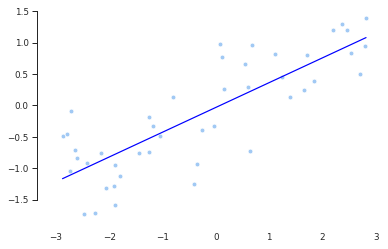

In [0]:
x = np.linspace(X_train.min(),X_train.max())
y = lr.coef_ * x + lr.intercept_

plt.figure()
# this converts X_train from 2d array to 1d list
sns.scatterplot(x=X_train.ravel().tolist(), y=y_train)
plt.plot(x, y, '-b')
pretty()
plt.show()

Here the accuracy of the model is not great, with and R-squared of ~0.66, however, the training and test sets are similar, which is often indicative of underfitting.  

With a dataset like the wave data, there are a small number of features, and this reduces the risk of overfitting, but as the number of features grows, so too does the risk of overfitting.

In [0]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


The Boston housing dataset has many more features (105) and a limited number of samples (506) which increases the overfitting risk. The discrepancy between the training and test sets is a clear sign of overfitting.

In [0]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


# Ridge Regression
Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the training data, but also to fit an additional constraint. We also want the magnitude of coefficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. The particular kind used by ridge regression is known as L2 regularization.  

Here, the training set score of Ridge is lower than for LinearRegression , while the test set score is higher. This is consistent with our expectation. With linear regression, we were overfitting our data. Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization.

In [0]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


The ridge model makes a trade-off between the simplicity of the model and the performance on the training set. The alpha parameter can be used to specify how simple the model should be. The higher the alpha, the more simplistic the resulting model will be, and therefore the less likely it will be to overfit the data.  

The default alpha is 1.

In [0]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


With small values of alpha, the model becomes much less restricted, and more closely resembles a simple linear regression model.

In [0]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


The following plot illustrates the difference between three different alpha values, where an alpha of 1 results in the `coef_` values being closer to a slope of zero and the lower alpha values result in `coef_` values existing much further away from zero.  

The way the data is displayed here is that the x=1 is the first feature, and x=2 is the second feature etc. and the y-axis displays the `coef_` value.

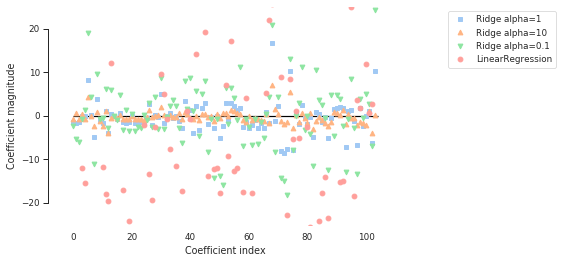

In [0]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
pretty()
legend()

Here is another way at evaluating the effect of altering the alpha. In this plot, the size of the Boston housing data is changed and the R-squared values of the linear models are displayed.  

In this plot it can be seen how with each increase in the size of the dataset, the regularization becomes increasingly less important. It can also be seen that as the size of the dataset increases, it becomes more difficult for the model to overfit the training set, as shown by the decreasing R-squared value of the training set.

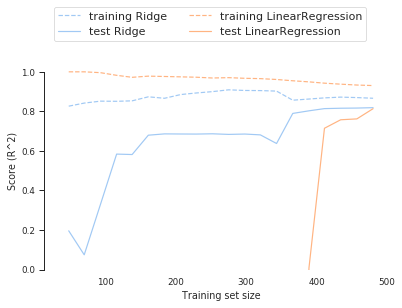

In [0]:
mglearn.plots.plot_ridge_n_samples()
pretty()

Lasso regularization is an alternative to Ridge regularization, which also restricts slope coefficients to bring them closer to zero using a method called L1 regularization. One major difference is the L1 regularization brings some coefficients to exactly zero, meaning that some of the features are entirely ignored. This can be helpful in revealing the most important features of the model.  

Here the model performs quite poorly with a an alpha of 1.

# Lasso Regularization

In [0]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.54
Test set score: 0.53
Number of features used: 3


Reducing the alpha will allow increased fitting of the data.  

Here the model only uses 33 features of the data and scores even a bit better than the Ride regularization.

In [0]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


As the alpha is further reduced, signs of overfitting become apparent.

In [0]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Here is a comparison between the two model types.  

In practice, typically the Ridge model is first used, but scikit-learn also has an `ElasticNet` class which combines the penalties from both the Lasso and the Ridge modeling to fit a good model to the data.

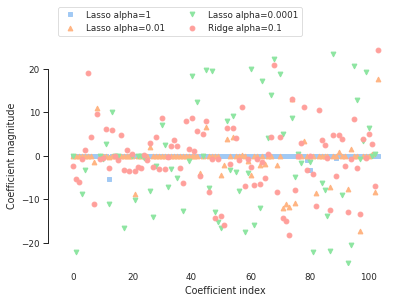

In [0]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
pretty()

# Linear models for classification
Classification models are conceptually similar to regression models, with the major difference that they attempt to separate data into two classifications (or more, depending on the number of features being used) rather than just fit a function to the data.  

The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression , and linear support vector machines (linear SVMs), implemented in svm.LinearSVC (SVC stands for support vector classifier). Despite its name, LogisticRegression is a classification algorithm and not a regression algorithm, and it should not be confused with LinearRegression.  

By default both the LinearSVC and the LogisticRegression apply an L2 regularization in the same way that Ridge does.

/home/alex/anaconda3/envs/informatics/lib/python3.7/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
/home/alex/anaconda3/envs/informatics/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alex/anaconda3/envs/informatics/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


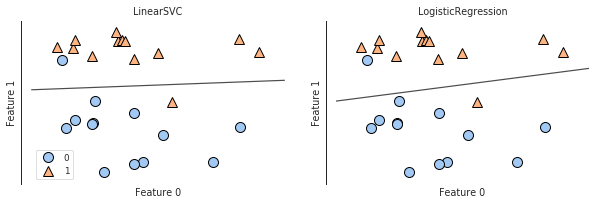

In [0]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
pretty()

The trade-off parameter that controls regularization is called C, where lower values of C correspond with greater regularization.  

In the following plots, when `C == 1000`, the model is likely overfitting because it is dramatically affected by the two points that seem to be commonly misclassified.

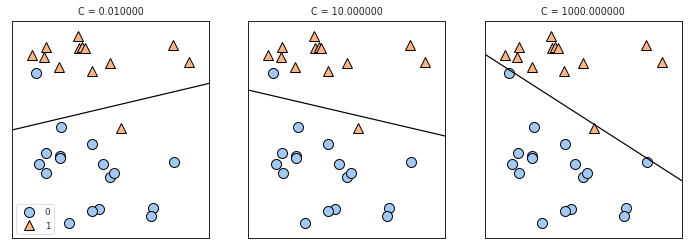

In [0]:
mglearn.plots.plot_linear_svc_regularization()

Here LogisticRegression is used on the Breast cancer dataset.  

While the results are quite good with `C==1`, because the training and test set performance ar so close, it is likely that the model is underfitting the data.

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


/home/alex/anaconda3/envs/informatics/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Here, the test accuracy is slightly improved by using a more complex model.

In [0]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


/home/alex/anaconda3/envs/informatics/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


A more regularized model performs much worse, as expected from the more complex model working so well above.

In [0]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/home/alex/anaconda3/envs/informatics/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Here is a display of the different regularization settings.

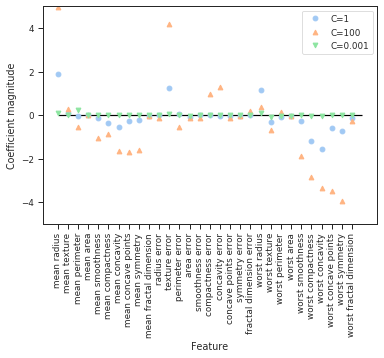

In [0]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

If we desire a more interpretable model, using L1 regularization might help, as it limits the model to using only a few features. Here is the coefficient plot and classification accuracies for L1 regularization.  

As you can see, there are many parallels between linear models for binary classification and linear models for regression. As in regression, the main difference between the models is the penalty parameter, which influences the regularization and whether the model will use all available features or select only a subset.

/home/alex/anaconda3/envs/informatics/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/anaconda3/envs/informatics/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/alex/anaconda3/envs/informatics/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alex/anaconda3/envs/informatics/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


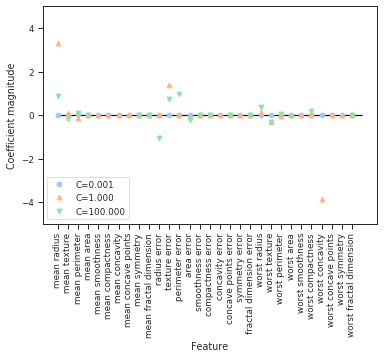

In [0]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

# Linear models for multiclass classification

Many linear classification models are for binary classification only, and don’t extend naturally to the multiclass case (with the exception of logistic regression). A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.  

Having one binary classifier per class results in having one vector of coefficients (w) and one intercept (b) for each class. The class for which the result of the classification confidence formula given here is highest is the assigned class label:  
w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b  

The mathematics behind multiclass logistic regression differ somewhat from the one-vs.-rest approach, but they also result in one coefficient vector and intercept per class, and the same method of making a prediction is applied.  

Let’s apply the one-vs.-rest method to a simple three-class classification dataset. We use a two-dimensional dataset, where each class is given by data sampled from a Gaussian distribution.

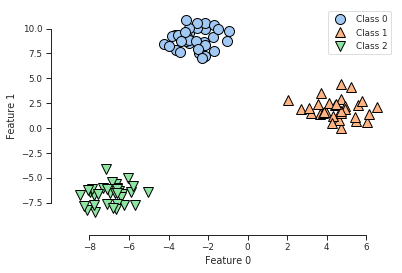

In [0]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
pretty(x=True)

Now, we train a LinearSVC classifier on the dataset.

In [0]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


We see that the shape of the coef_ is (3, 2) , meaning that each row of coef_ contains the coefficient vector for one of the three classes and each column holds the coefficient value for a specific feature (there are two in this dataset). The intercept_ is now a one-dimensional array, storing the intercepts for each class.  

Below is a visualization of the lines given by the three binary classifiers.

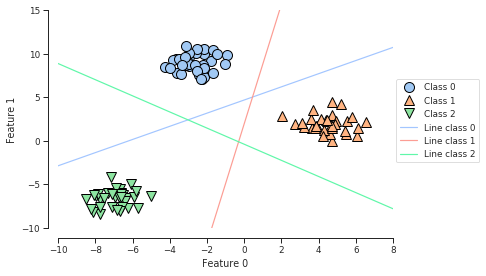

In [0]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
colors=['#a3c6ff','#fc9d94','#60f7a9']

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
pretty(x=True)

In the above plot, all the points belonging to class 0 in the training data are above the line corresponding to class 0, which means they are on the “class 0” side of this binary classifier. The points in class 0 are above the line corresponding to class 2, which means they are classified as “rest” by the binary classifier for class 2. The points belonging to class 0 are to the left of the line corresponding to class 1, which means the binary classifier for class 1 also classifies them as “rest.” Therefore, any point in this area will be classified as class 0 by the final classifier (the result of the classification confidence formula for classifier 0 is greater than zero, while it is smaller than zero for the other two classes).  

But what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest.” Which class would a point there be assigned to? The answer is the one with the highest value for the classification formula: the class of the closest line.  

The following plot shows the predictions for all regions in the displayed space.

Text(0, 0.5, 'Feature 1')

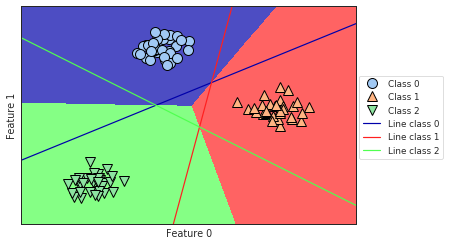

In [0]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

The main parameter of linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression . Large values for alpha or small values for C mean simple models. In particular for the regression models, tuning these parameters is quite important. Usually C and alpha are searched for on a logarithmic scale. The other decision you have to make is whether you want to use L1 regularization or L2 regularization. If you assume that only a few of your features are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.  


Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. If your data consists of hundreds of thousands or millions of samples, you might want to investigate using the solver='sag' option in LogisticRegression and Ridge , which can be faster than the default on large datasets. Other options are the SGDClassifier class and the SGDRegressor class, which implement even more scalable versions of the linear models described here.  


Another strength of linear models is that they make it relatively easy to understand how a prediction is made, using the formulas we saw earlier for regression and classification. Unfortunately, it is often not entirely clear why coefficients are the way they are. This is particularly true if your dataset has highly correlated features; in these cases, the coefficients might be hard to interpret.  

Linear models often perform well when the number of features is large compared to the number of samples. They are also often used on very large datasets, simply because it’s not feasible to train other models. However, in lower-dimensional spaces, other models might yield better generalization performance.

# Naive Bayes Classifiers
Naive Bayes classifiers are a family of classifiers that are quite similar to the linear models discussed in the previous section. However, they tend to be even faster in training. The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than that of linear classifiers like LogisticRegression and LinearSVC.  

The reason that naive Bayes models are so efficient is that they learn parameters by looking at each feature individually and collect simple per-class statistics from each feature. There are three kinds of naive Bayes classifiers implemented in scikit-learn : GaussianNB , BernoulliNB , and MultinomialNB. GaussianNB can be applied to any continuous data, while BernoulliNB assumes binary data and MultinomialNB assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence). BernoulliNB and MultinomialNB are mostly used in text data classification.  

The BernoulliNB classifier counts how often every feature of each class is not zero.

In [0]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

Here, we have four data points, with four binary features each. There are two classes, 0 and 1. For class 0 (the first and third data points), the first feature is zero two times and nonzero zero times, the second feature is zero one time and nonzero one time, and so on. These same counts are then calculated for the data points in the second class. Counting the nonzero entries per class in essence looks like the following.

In [0]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


The other two naive Bayes models, MultinomialNB and GaussianNB , are slightly different in what kinds of statistics they compute. MultinomialNB takes into account the average value of each feature for each class, while GaussianNB stores the average value as well as the standard deviation of each feature for each class.  

To make a prediction, a data point is compared to the statistics for each of the classes, and the best matching class is predicted. Interestingly, for both MultinomialNB and BernoulliNB , this leads to a prediction formula that is of the same form as in the linear models (see “Linear models for classification” on page 58). Unfortunately, coef_ for the naive Bayes models has a somewhat different meaning than in the linear models, in that coef_ is not the same as w.  

MultinomialNB and BernoulliNB have a single parameter, alpha , which controls model complexity. The way alpha works is that the algorithm adds to the data alpha many virtual data points that have positive values for all the features. This results in a “smoothing” of the statistics. A large alpha means more smoothing, resulting in less complex models. The algorithm’s performance is relatively robust to the setting of alpha , meaning that setting alpha is not critical for good performance. However, tuning it usually improves accuracy somewhat.  

GaussianNB is mostly used on very high-dimensional data, while the other two variants of naive Bayes are widely used for sparse count data such as text. MultinomialNB usually performs better than BernoulliNB , particularly on datasets with a relatively large number of nonzero features (i.e., large documents).  

The naive Bayes models share many of the strengths and weaknesses of the linear models. They are very fast to train and to predict, and the training procedure is easy to understand. The models work very well with high-dimensional sparse data and are relatively robust to the parameters. Naive Bayes models are great baseline models and are often used on very large datasets, where training even a linear model might take too long.

# Decision Trees
Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision.  

These questions are similar to the questions you might ask in a game of 20 Questions. Imagine you want to distinguish between the following four animals: bears, hawks, penguins, and dolphins. Your goal is to get to the right answer by asking as few if/else questions as possible. You might start off by asking whether the animal has feathers, a question that narrows down your possible animals to just two. If the answer is “yes,” you can ask another question that could help you distinguish between hawks and penguins. For example, you could ask whether the animal can fly. If the animal doesn’t have feathers, your possible animal choices are dolphins and bears, and you will need to ask a question to distinguish between these two animals—for example, asking whether the animal has fins.

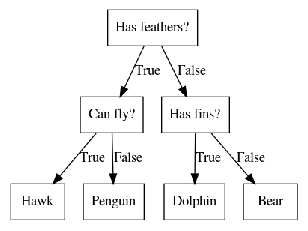

In [0]:
mglearn.plots.plot_animal_tree()

In this illustration, each node in the tree either represents a question or a terminal node (also called a leaf) that contains the answer. The edges connect the answers to a question with the next question you would ask.  

In machine learning parlance, we built a model to distinguish between four classes of animals (hawks, penguins, dolphins, and bears) using the three features “has feathers,” “can fly,” and “has fins.” Instead of building these models by hand, we can learn them from data using supervised learning.  

To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable. Figure 2-24 shows the first test that is picked. Splitting the dataset horizontally at x[1]=0.0596 yields the most information; it best separates the points in class 0 from the points in class 1. The top node, also called the root, represents the whole dataset, consisting of 75 points belonging to class 0 and 75 points belonging to class 1. The split is done by testing whether x[1] <= 0.0596, indicated by a black line. If the test is true, a point is assigned to the left node, which contains 2 points belonging to class 0 and 32 points belonging to class 1. Otherwise the point is assigned to the right node, which contains 48 points belonging to class 0 and 18 points belonging to class 1. These two nodes correspond to the top and bottom regions shown in Figure 2-24. Even though the first split did a good job of separating the two classes, the bottom region still contains points belonging to class 0, and the top region still contains points belonging to class 1. We can build a more accurate model by repeating the process of looking for the best test in both regions. Figure 2-25 shows that the most informative next split for the left and the right region is based on x[0].  

This recursive process yields a binary tree of decisions, with each node containing a test. Alternatively, you can think of each test as splitting the part of the data that is currently being considered along one axis. This yields a view of the algorithm as building a hierarchical partition. As each test concerns only a single feature, the regions in the resulting partition always have axis-parallel boundaries.  

The recursive partitioning of the data is repeated until each region in the partition (each leaf in the decision tree) only contains a single target value (a single class or a single regression value). A leaf of the tree that contains data points that all share the same target value is called pure. The final partitioning for this dataset is shown in Figure 2-26.  

A prediction on a new data point is made by checking which region of the partition of the feature space the point lies in, and then predicting the majority target (or the single target in the case of pure leaves) in that region. The region can be found by traversing the tree from the root and going left or right, depending on whether the test is fulfilled or not.  

It is also possible to use trees for regression tasks, using exactly the same technique. To make a prediction, we traverse the tree based on the tests in each node and find the leaf the new data point falls into. The output for this data point is the mean target of the training points in this leaf.  

### Controlling complexity of decision trees
Typically, building a tree as described here and continuing until all leaves are pure leads to models that are very complex and highly overfit to the training data. The presence of pure leaves mean that a tree is 100% accurate on the training set; each data point in the training set is in a leaf that has the correct majority class. The over‐fitting can be seen on the left of Figure 2-26. You can see the regions determined to belong to class 1 in the middle of all the points belonging to class 0. On the other hand, there is a small strip predicted as class 0 around the point belonging to class 1 to the very right. This is not how one would imagine the decision boundary to look, and the decision boundary focuses a lot on single outlier points that are far away from the other points in that class.  

There are two common strategies to prevent overfitting: stopping the creation of the tree early (also called pre-pruning), or building the tree but then removing or collapsing nodes that contain little information (also called post-pruning or just pruning). Possible criteria for pre-pruning include limiting the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it.  

Decision trees in scikit-learn are implemented in the DecisionTreeRegressor and DecisionTreeClassifier classes. scikit-learn only implements pre-pruning, not post-pruning.  

Let’s look at the effect of pre-pruning in more detail on the Breast Cancer dataset. As always, we import the dataset and split it into a training and a test part. Then we build a model using the default setting of fully developing the tree (growing the tree until all leaves are pure). We fix the random_state in the tree, which is used for tie-breaking internally.

In [0]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


As expected, the accuracy on the training set is 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. The test set accuracy is slightly worse than for the linear models we looked at previously, which had around 95% accuracy.  

If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data. Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. Here we set max_depth=4 , meaning only four consecutive questions can be asked. Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [0]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### Analyzing decision trees
We can visualize the tree using the export_graphviz function from the tree module. This writes a file in the .dot file format, which is a text file format for storing graphs. We set an option to color the nodes to reflect the majority class in each node and pass the class and features names so the tree can be properly labeled.

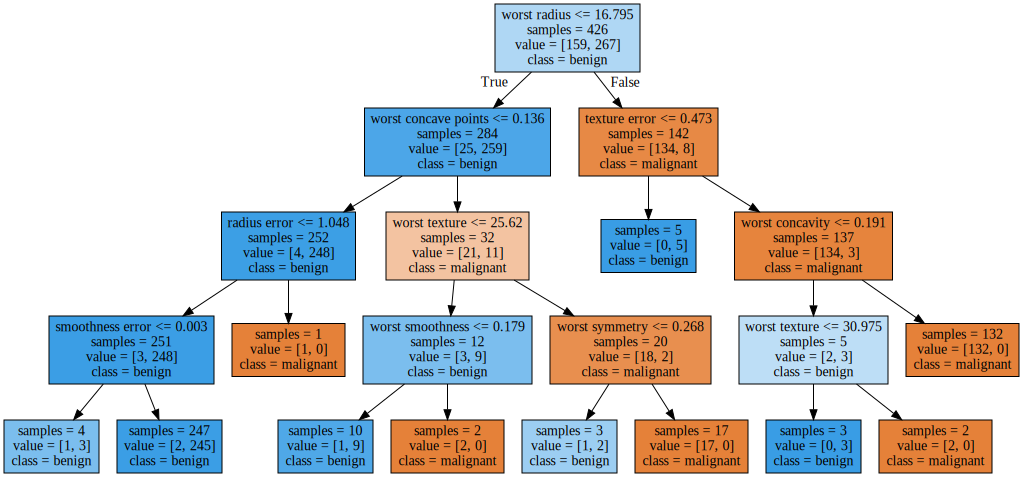

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

The visualization of the tree provides a great in-depth view of how the algorithm makes predictions, and is a good example of a machine learning algorithm that is easily explained to nonexperts. However, even with a tree of depth four, as seen here, the tree can become a bit overwhelming. Deeper trees (a depth of 10 is not uncommon) are even harder to grasp. One method of inspecting the tree that may be helpful is to find out which path most of the data actually takes. The samples shown in each node above gives the number of samples in that node, while value provides the number of samples per class. Following the branches to the right, we see that worst radius > 16.795 creates a node that contains only 8 benign but 134 malignant samples. The rest of this side of the tree then uses some finer distinctions to split off these 8 remaining benign samples. Of the 142 samples that went to the right in the initial split, nearly all of them (132) end up in the leaf to the very right.  

Taking a left at the root, for worst radius <= 16.795 we end up with 25 malignant and 259 benign samples. Nearly all of the benign samples end up in the second leaf from the left, with most of the other leaves containing very few samples.  

### Feature importance in trees
Instead of looking at the whole tree, which can be taxing, there are some useful properties that we can derive to summarize the workings of the tree. The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1.

In [0]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


We can visualize the feature importances in a way that is similar to the way we visualize the coefficients in the linear model.

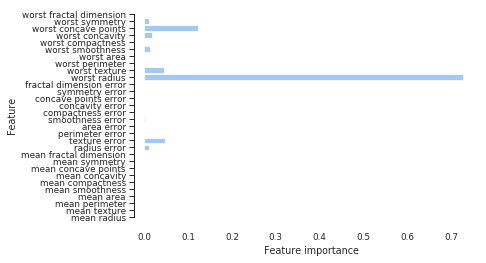

In [0]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)
pretty()

Here we see that the feature used in the top split (“worst radius”) is by far the most important feature. This confirms our observation in analyzing the tree that the first level already separates the two classes fairly well.  

However, if a feature has a low value in feature_importance_ , it doesn’t mean that this feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information.  

In contrast to the coefficients in linear models, feature importances are always positive, and don’t encode which class a feature is indicative of. The feature importances tell us that “worst radius” is important, but not whether a high radius is indicative of a sample being benign or malignant. In fact, there might not be such a simple relationship between features and class, as you can see in the following example.

Feature importances: [0. 1.]


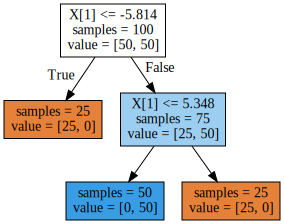

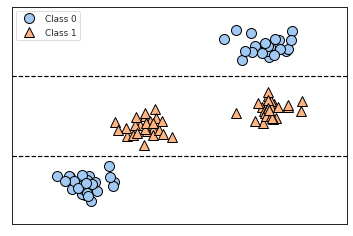

In [0]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

The plot shows a dataset with two features and two classes. Here, all the information is contained in X[1] , and X[0] is not used at all. But the relation between X[1] and the output class is not monotonous, meaning we cannot say “a high value of X[1] means class 0, and a low value means class 1” (or vice versa).  

While we focused our discussion here on decision trees for classification, all that was said is similarly true for decision trees for regression, as implemented in Decision TreeRegressor . The usage and analysis of regression trees is very similar to that of classification trees. There is one particular property of using tree-based models for regression that we want to point out, though. The DecisionTreeRegressor (and all other tree-based regression models) is not able to extrapolate, or make predictions outside of the range of the training data.  

Let’s look into this in more detail, using a dataset of historical computer memory (RAM) prices. Below shows the dataset, with the date on the x-axis and the price of one megabyte of RAM in that year on the y-axis.

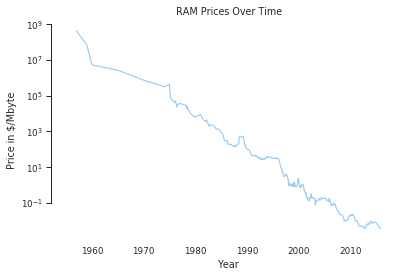

In [0]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,
"ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")
plt.title("RAM Prices Over Time")
pretty()

Note the logarithmic scale of the y-axis. When plotting logarithmically, the relation seems to be quite linear and so should be relatively easy to predict, apart from some bumps.  

We will make a forecast for the years after 2000 using the historical data up to that point, with the date as our only feature. We will compare two simple models: a DecisionTreeRegressor and LinearRegression . We rescale the prices using a logarithm, so that the relationship is relatively linear. This doesn’t make a difference for the DecisionTreeRegressor , but it makes a big difference for LinearRegression (we will discuss this in more depth in Chapter 4). After training the models and making predictions, we apply the exponential map to undo the logarithm transform. We make predictions on the whole dataset for visualization purposes here, but for a quantitative evaluation we would only consider the test dataset.

In [0]:
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

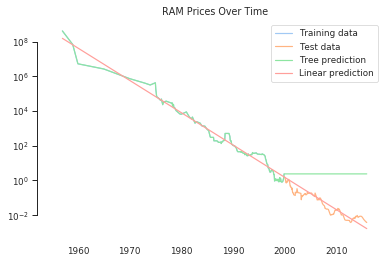

In [0]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()
plt.title("RAM Prices Over Time")
pretty()

The difference between the models is quite striking. The linear model approximates the data with a line, as we knew it would. This line provides quite a good forecast for the test data (the years after 2000), while glossing over some of the finer variations in both the training and the test data. The tree model, on the other hand, makes perfect predictions on the training data; we did not restrict the complexity of the tree, so it learned the whole dataset by heart. However, once we leave the data range for which the model has data, the model simply keeps predicting the last known point. The tree has no ability to generate “new” responses, outside of what was seen in the training data. This shortcoming applies to all models based on trees.  

As discussed earlier, the parameters that control model complexity in decision trees are the pre-pruning parameters that stop the building of the tree before it is fully developed. Usually, picking one of the pre-pruning strategies—setting either max_depth , max_leaf_nodes , or min_samples_leaf —is sufficient to prevent overfitting.  

Decision trees have two advantages over many of the algorithms we’ve discussed so far: the resulting model can easily be visualized and understood by nonexperts (at least for smaller trees), and the algorithms are completely invariant to scaling of the data. As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms. In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and continuous features.  

The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. Therefore, in most applications, the ensemble methods we discuss next are usually used in place of a single decision tree.

# Ensembles of Decision Trees
Ensembles are methods that combine multiple machine learning models to create more powerful models. There are many models in the machine learning literature that belong to this category, but there are two ensemble models that have proven to be effective on a wide range of datasets for classification and regression, both of which use decision trees as their building blocks: random forests and gradient boosted decision trees.  

### Random forests
As we just observed, a main drawback of decision trees is that they tend to overfit the training data. Random forests are one way to address this problem. A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. This reduction in overfitting, while retaining the predictive power of the trees, can be shown using rigorous mathematics.  

To implement this strategy, we need to build many decision trees. Each tree should do an acceptable job of predicting the target, and should also be different from the other trees. Random forests get their name from injecting randomness into the tree building to ensure each tree is different. There are two ways in which the trees in a random forest are randomized: by selecting the data points used to build a tree and by selecting the features in each split test. Let’s go into this process in more detail.  

Building random forests. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier ). Let’s say we want to build 10 trees. These trees will be built completely independently from each other, and the algorithm will make different random choices for each tree to make sure the trees are distinct. To build a tree, we first take what is called a bootstrap sample of our data. That is, from our n_samples data points, we repeatedly draw an example randomly with replacement (meaning the same sample can be picked multiple times), n_samples times. This will create a dataset that is as big as the original dataset, but some data points will be missing from it (approximately one third), and some will be repeated.  

To illustrate, let’s say we want to create a bootstrap sample of the list ['a', 'b', 'c', 'd'] . A possible bootstrap sample would be ['b', 'd', 'd', 'c'] . Another possible sample would be ['d', 'a', 'd', 'a'].  

Next, a decision tree is built based on this newly created dataset. However, the algorithm we described for the decision tree is slightly modified. Instead of looking for the best test for each node, in each node the algorithm randomly selects a subset of the features, and it looks for the best possible test involving one of these features. The number of features that are selected is controlled by the max_features parameter. This selection of a subset of features is repeated separately in each node, so that each node in a tree can make a decision using a different subset of the features.  

The bootstrap sampling leads to each decision tree in the random forest being built on a slightly different dataset. Because of the selection of features in each node, each split in each tree operates on a different subset of features. Together, these two mechanisms ensure that all the trees in the random forest are different.  

A critical parameter in this process is max_features . If we set max_features to n_features , that means that each split can look at all features in the dataset, and no randomness will be injected in the feature selection (the randomness due to the bootstrapping remains, though). If we set max_features to 1 , that means that the splits have no choice at all on which feature to test, and can only search over different thresholds for the feature that was selected randomly. Therefore, a high max_features means that the trees in the random forest will be quite similar, and they will be able to fit the data easily, using the most distinctive features. A low max_features means that the trees in the random forest will be quite different, and that each tree might need to be very deep in order to fit the data well.  

To make a prediction using the random forest, the algorithm first makes a prediction for every tree in the forest. For regression, we can average these results to get our final prediction. For classification, a “soft voting” strategy is used. This means each algorithm makes a “soft” prediction, providing a probability for each possible output label. The probabilities predicted by all the trees are averaged, and the class with the highest probability is predicted.  

Below is a random forest consisting of five trees applied to the two_moons dataset from earlier.

In [0]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

The trees that are built as part of the random forest are stored in the estimator_ attribute. Let’s visualize the decision boundaries learned by each tree, together with their aggregate prediction as made by the forest.

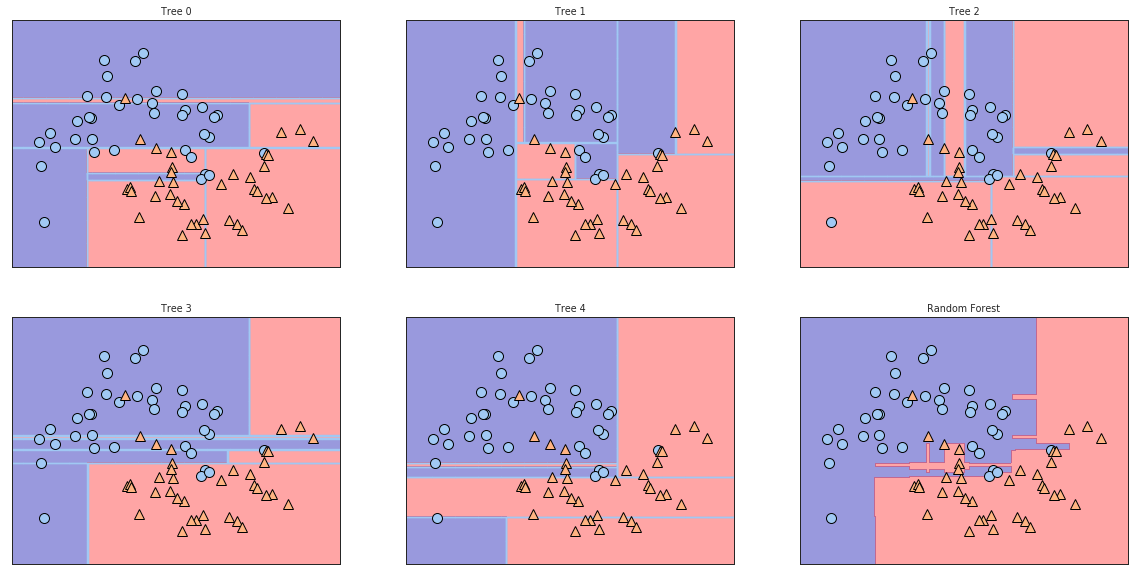

In [0]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

You can clearly see that the decision boundaries learned by the five trees are quite different. Each of them makes some mistakes, as some of the training points that are plotted here were not actually included in the training sets of the trees, due to the bootstrap sampling.  

The random forest overfits less than any of the trees individually, and provides a much more intuitive decision boundary. In any real application, we would use many more trees (often hundreds or thousands), leading to even smoother boundaries.  

As another example, let’s apply a random forest consisting of 100 trees on the Breast Cancer dataset.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


The random forest gives us an accuracy of 97%, better than the linear models or a single decision tree, without tuning any parameters. We could adjust the max_fea tures setting, or apply pre-pruning as we did for the single decision tree. However, often the default parameters of the random forest already work quite well.  

Similarly to the decision tree, the random forest provides feature importances, which are computed by aggregating the feature importances over the trees in the forest. Typically, the feature importances provided by the random forest are more reliable than the ones provided by a single tree.

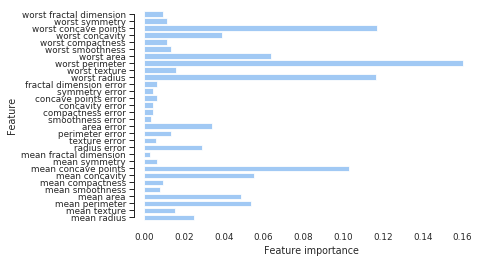

In [0]:
plot_feature_importances_cancer(forest)
pretty()

As you can see, the random forest gives nonzero importance to many more features than the single tree. Similarly to the single decision tree, the random forest also gives a lot of importance to the “worst radius” feature, but it actually chooses “worst perimeter” to be the most informative feature overall. The randomness in building the random forest forces the algorithm to consider many possible explanations, the result being that the random forest captures a much broader picture of the data than a single tree.  

### Strengths, weaknesses, and parameters.  
Random forests for regression and classification are currently among the most widely used machine learning methods. They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.  

Essentially, random forests share all of the benefits of decision trees, while making up for some of their deficiencies. One reason to still use decision trees is if you need a compact representation of the decision-making process. It is basically impossible to interpret tens or hundreds of trees in detail, and trees in random forests tend to be deeper than decision trees (because of the use of feature subsets). Therefore, if you need to summarize the prediction making in a visual way to nonexperts, a single decision tree might be a better choice. While building random forests on large datasets might be somewhat time consuming, it can be parallelized across multiple CPU cores within a computer easily. If you are using a multi-core processor (as nearly all modern computers do), you can use the n_jobs parameter to adjust the number of cores to use. Using more CPU cores will result in linear speed-ups (using two cores, the training of the random forest will be twice as fast), but specifying n_jobs larger than the number of cores will not help. You can set n_jobs=-1 to use all the cores in your computer.  

You should keep in mind that random forests, by their nature, are random, and setting different random states (or not setting the random_state at all) can drastically change the model that is built. The more trees there are in the forest, the more robust it will be against the choice of random state. If you want to have reproducible results, it is important to fix the random_state.  

Random forests don’t tend to perform well on very high dimensional, sparse data, such as text data. For this kind of data, linear models might be more appropriate. Random forests usually work well even on very large datasets, and training can easily be parallelized over many CPU cores within a powerful computer. However, random forests require more memory and are slower to train and to predict than linear models. If time and memory are important in an application, it might make sense to use a linear model instead.  

The important parameters to adjust are n_estimators , max_features , and possibly pre-pruning options like max_depth . For n_estimators , larger is always better. Averaging more trees will yield a more robust ensemble by reducing overfitting. However, there are diminishing returns, and more trees need more memory and more time to train. A common rule of thumb is to build “as many as you have time/memory for.” As described earlier, max_features determines how random each tree is, and a smaller max_features reduces overfitting. In general, it’s a good rule of thumb to use the default values: max_features=sqrt(n_features) for classification and max_features=n_features for regression. Adding max_features or max_leaf_nodes might sometimes improve performance. It can also drastically reduce space and time requirements for training and prediction.

### Gradient boosted regression trees (gradient boosting machines)
The gradient boosted regression tree is another ensemble method that combines multiple decision trees to create a more powerful model. Despite the “regression” in the name, these models can be used for regression and classification. In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one. By default, there is no randomization in gradient boosted regression trees; instead, strong pre-pruning is used. Gradient boosted trees often use very shallow trees, of depth one to five, which makes the model smaller in terms of memory and makes predictions faster.  

The main idea behind gradient boosting is to combine many simple models (in this context known as weak learners), like shallow trees. Each tree can only provide good predictions on part of the data, and so more and more trees are added to iteratively improve performance.  

Gradient boosted trees are frequently the winning entries in machine learning competitions, and are widely used in industry. They are generally a bit more sensitive to parameter settings than random forests, but can provide better accuracy if the parameters are set correctly.  

Apart from the pre-pruning and the number of trees in the ensemble, another important parameter of gradient boosting is the learning_rate , which controls how strongly each tree tries to correct the mistakes of the previous trees. A higher learning rate means each tree can make stronger corrections, allowing for more complex models. Adding more trees to the ensemble, which can be accomplished by increasing n_estimators , also increases the model complexity, as the model has more chances to correct mistakes on the training set.  

Here is an example of using GradientBoostingClassifier on the Breast Cancer dataset. By default, 100 trees of maximum depth 3 and a learning rate of 0.1 are used.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfitting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate.

In [0]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [0]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


Both methods of decreasing the model complexity reduced the training set accuracy, as expected. In this case, lowering the maximum depth of the trees provided a significant improvement of the model, while lowering the learning rate only increased the generalization performance slightly.  

As for the other decision tree–based models, we can again visualize the feature importances to get more insight into our model (Figure 2-35). As we used 100 trees, it is impractical to inspect them all, even if they are all of depth 1.

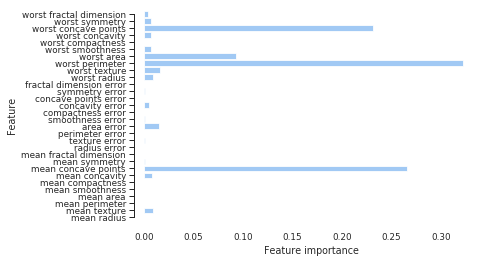

In [0]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)
pretty()

We can see that the feature importances of the gradient boosted trees are somewhat similar to the feature importances of the random forests, though the gradient boosting completely ignored some of the features.  

As both gradient boosting and random forests perform well on similar kinds of data, a common approach is to first try random forests, which work quite robustly. If random forests work well but prediction time is at a premium, or it is important to squeeze out the last percentage of accuracy from the machine learning model, moving to gradient boosting often helps.  

If you want to apply gradient boosting to a large-scale problem, it might be worth looking into the xgboost package and its Python interface, which at the time of writing is faster (and sometimes easier to tune) than the scikit-learn implementation of gradient boosting on many datasets.  

### Strengths, weaknesses, and parameters.
Gradient boosted decision trees are among the most powerful and widely used models for supervised learning. Their main drawback is that they require careful tuning of the parameters and may take a long time to train. Similarly to other tree-based models, the algorithm works well without scaling and on a mixture of binary and continuous features. As with other tree-based models, it also often does not work well on high-dimensional sparse data.  

The main parameters of gradient boosted tree models are the number of trees, n_estimators , and the learning_rate , which controls the degree to which each tree is allowed to correct the mistakes of the previous trees. These two parameters are highly interconnected, as a lower learning_rate means that more trees are needed to build a model of similar complexity. In contrast to random forests, where a higher n_estimators value is always better, increasing n_estimators in gradient boosting leads to a more complex model, which may lead to overfitting. A common practice is to fit n_estimators depending on the time and memory budget, and then search over different learning_rates.  

Another important parameter is max_depth (or alternatively max_leaf_nodes ), to reduce the complexity of each tree. Usually max_depth is set very low for gradient boosted models, often not deeper than five splits.

# Kernelized Support Vector Machines
The next type of supervised model we will discuss is kernelized support vector machines. We explored the use of linear support vector machines for classification in “Linear models for classification” on page 58. Kernelized support vector machines (often just referred to as SVMs) are an extension that allows for more complex models that are not defined simply by hyperplanes in the input space. While there are support vector machines for classification and regression, we will restrict ourselves to the classification case, as implemented in SVC . Similar concepts apply to support vector regression, as implemented in SVR.  

The math behind kernelized support vector machines is a bit involved, and is beyond the scope of this book. You can find the details in Chapter 12 of Hastie, Tibshirani, and Friedman’s The Elements of Statistical Learning. However, we will try to give you some sense of the idea behind the method.  

### Linear models and nonlinear features
As you saw in Figure 2-15, linear models can be quite limiting in low-dimensional spaces, as lines and hyperplanes have limited flexibility. One way to make a linear model more flexible is by adding more features—for example, by adding interactions or polynomials of the input features.  

Let’s look at the synthetic dataset we used in “Feature importance in trees”.

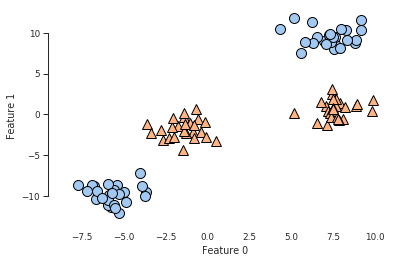

In [0]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
pretty()

A linear model for classification can only separate points using a line, and will not be able to do a very good job on this dataset.

/home/alex/anaconda3/envs/new_informatics/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


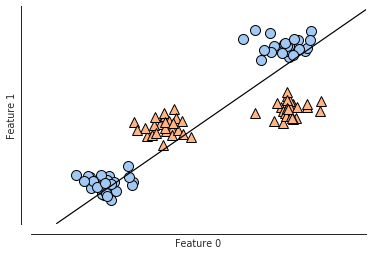

In [0]:
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
pretty(x=True)